# TP3 Stochastic integration

In [28]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm

In [29]:
T = 2 #years 
M = 1000 #number of samples
n = 10
mean = 0 
std = 1

## stochastic integration

For a positive integer $\mathcal{n}$ we denote $ \Delta\mathrm{T} := \frac{\mathrm{T}}{n}  $,  $ t_i^n := i\Delta\mathrm{T} $,  $ i = 0,...,n $.\
\
We consider a **Brownion motion** $\mathcal{W}$, and we denote : $ \Delta\mathcal{W}_{t_i^n} := \mathcal{W}_{t_i^n} - \mathcal{W}_{t_{i-1}^n} $
 ,  $ i = 1,...,n $.


## Question 1 : 

In the view of the approximation of $ \int_0^\mathrm{T}{\mathcal{W}_s\mathcal{dW}_s} $ we consider :

\begin{equation}
\mathrm{I}_n := \sum_{i=1}^n{\mathcal{W}_{t_{i-1}^n} \: \Delta\mathcal{W}_{t_i^n}},  \; \; 
\mathrm{J}_n := \sum_{i=1}^n{\mathcal{W}_{t_i^n} \: \Delta\mathcal{W}_{t_i^n}},   \; \;  
\mathrm{K}_n := \sum_{i=1}^n{\frac{\mathcal{W}_{t_{i-1}^n}\:+\:\mathcal{W}_{t_i^n}}{2} \: \Delta\mathcal{W}_{t_i^n}} \; \; .
\end{equation}

### Question 1.a : 

In [40]:
#simulating B.M using the forward simulation from the TP2 

N = 40  

def brownianMotion(N=N, T=T):
    delta_T = (T / N)
    Z = np.random.normal(mean, std, size=(N + 1))
    W = np.zeros(N + 1)
    W[0] = Z[0] * np.sqrt(delta_T)
    for j in range(1, N + 1):
        W[j] = W[j-1] + np.sqrt(delta_T) * Z[j] 
    return W
    


In [41]:
#simulating 1/2 WT² - In   

def sim_1(M=M, N=N, T=T): 
    Samples = np.zeros(M)
    for i in range(M): 
        W = brownianMotion(N, T)
        In = 0 
        for j in range(N): 
            In += W[j] * (W[j + 1] - W[j])
        Samples[i] = (1 / 2) * (W[N] ** 2) - In 
    
    return Samples  

In [42]:
#simulating 1/2 WT² - Jn   

def sim_2(M=M, N=N, T=T): 
    Samples = np.zeros(M)
    for i in range(M): 
        W = brownianMotion(N, T)
        Jn = 0 
        for j in range(N): 
            Jn += W[j + 1] * (W[j + 1] - W[j])
        Samples[i] = (1 / 2) * (W[N] ** 2) - Jn 
    
    return Samples  

In [43]:
#simulating 1/2 WT² - Kn   

def sim_3(M=M, N=N, T=T): 
    Samples = np.zeros(M)
    for i in range(M): 
        W = brownianMotion(N, T)
        Kn = 0 
        for j in range(N): 
            Kn += ((W[j + 1] + W[j]) / 2) * (W[j + 1] - W[j])
        Samples[i] = (1 / 2) * (W[N] ** 2) - Kn 
    
    return Samples  

### Question 1.b : 

In [159]:
In = sim_1(M, N, T)
Jn = sim_2(M, N, T)
Kn = sim_3(M, N, T)


#sample means 
Mean_In = np.mean(In)
Mean_Jn = np.mean(Jn)
Mean_Kn = np.mean(Kn)

#confidence interval's half width 
Var_In = np.var(In)
Var_Jn = np.var(Jn)
Var_Kn = np.var(Kn)

interval_HW_In =  1.96 * np.sqrt(Var_In / M)
interval_HW_Jn =  1.96 * np.sqrt(Var_Jn / M)
interval_HW_Kn =  1.96 * np.sqrt(Var_Kn / M)

print("Sample size = %d" %(M))  
print( "Means :" )
print("Mean of 1/2 WT² - In = %1.3f " %(Mean_In))
print("Mean of 1/2 WT² - Jn = %1.3f " %(Mean_Jn))
print("Mean of 1/2 WT² - Kn = %1.3f " %(Mean_Kn))
print( "Confidence interval's half width :")
print("Confidence interval half width of the estimator In = %1.3f" %(interval_HW_In))
print("Confidence interval half width of the estimator Jn = %1.3f" %(interval_HW_Jn))
print("Confidence interval half width of the estimator Kn = %1.3f" %(interval_HW_Kn))

Sample size = 1000
Means :
Mean of 1/2 WT² - In = 1.015 
Mean of 1/2 WT² - Jn = -0.975 
Mean of 1/2 WT² - Kn = 0.025 
Confidence interval's half width :
Confidence interval half width of the estimator In = 0.014
Confidence interval half width of the estimator Jn = 0.014
Confidence interval half width of the estimator Kn = 0.002


## Theoretical convergence of the three series:

### theoretical integral

**We know that :**  
\begin{equation}
\int_0^\mathrm{t}{\mathcal{W}_s\mathcal{dW}_s} = \frac{1}{2}  \: \mathcal{W^2}_{t} - t 
\end{equation}

   ***1) Convergence of***   $ \; \mathrm{I}_n$ :    

\begin{align}
\mathrm{I}_n &= \sum_{i=1}^n{\mathcal{W}_{t_{i-1}^n} \: \Delta\mathcal{W}_{t_i^n}} \\
             &= \frac{1}{2} \: \sum_{i=1}^n{ 2\mathcal{W}_{t_{i-1}^n} \: \Delta\mathcal{W}_{t_i^n}} \\
             &= \frac{1}{2} \: ( \:\sum_{i=1}^n{ (\mathcal{W^2}_{t_i^n} - \mathcal{W^2}_{t_{i-1}^n}) \: - \: \sum_{i=1}^n{ (\mathcal{W}_{t_i^n} - \mathcal{W}_{t_{i-1}^n}})^2  \:) } \; ( the \: second \: sum \: is \: the \: \textbf{Quadratic variation}\: ) \\
             &= \frac{1}{2} ( \: \mathcal{W^2}_{T} - T \: ) 
\end{align}
***So we have :*** 
\begin{equation}
\frac{1}{2}\:\mathcal{W^2}_{T} - \mathrm{I}_n \xrightarrow{n \rightarrow +\infty }  \frac{T}{2} ( \:= 1)
\end{equation}
**Conclusion :** the theoretical results are coherent with the numerical ones, in fact, T/2 = 1 and we got a mean of 1.015 $\simeq$ 1 from the simulation of $\frac{1}{2}\mathcal{W^2}_{T} - \mathrm{I}_n $.


   ***2) Convergence of***   $ \; \mathrm{J}_n$ :    

\begin{align}
\mathrm{J}_n &= \sum_{i=1}^n{\mathcal{W}_{t_i^n} \: \Delta\mathcal{W}_{t_i^n}} \\
             &= \frac{1}{2} \: \sum_{i=1}^n{ 2\mathcal{W}_{t_i^n} \: \Delta\mathcal{W}_{t_i^n}} \\
             &= \frac{1}{2} \: ( \:\sum_{i=1}^n{ (\mathcal{W^2}_{t_i^n} - \mathcal{W^2}_{t_{i-1}^n}) \: + \: \sum_{i=1}^n{ (\mathcal{W}_{t_i^n} - \mathcal{W}_{t_{i-1}^n}})^2  \:) } \; ( the \: second \: sum \: is \: the \: \textbf{Quadratic variation}\: ) \\
             &= \frac{1}{2} ( \: \mathcal{W^2}_{T} + T \: ) 
\end{align}
***So we have :*** 
\begin{equation}
\frac{1}{2}\:\mathcal{W^2}_{T} - \mathrm{J}_n \xrightarrow{n \rightarrow +\infty }  -\frac{T}{2} ( \:= -1)
\end{equation}
**Conclusion :** the theoretical results are coherent with the numerical ones, in fact, -T/2 = -1 and we got a mean of - 0.975 $\simeq$ -1 from the simulation of $\frac{1}{2}\mathcal{W^2}_{T} - \mathrm{J}_n $.

***3) Convergence of***   $ \; \mathrm{K}_n$ : 

\begin{align}
\mathrm{K}_n &= \frac{(\: \mathrm{I}_n \: + \: \mathrm{J}_n \:)}{2} 
\end{align}

***So we have :***  

\begin{equation}
\mathrm{K}_n \xrightarrow{n \rightarrow +\infty } \frac{ \frac{T}{2} + (-\frac{T}{2}) }{2} = 0
\end{equation}



### Question 1.c : 

In [161]:
#confidence interval's half width 

def interval_HW(L, M=M): 
    Var_L = np.var(L)
    return 1.96 * np.sqrt(Var_L / M)


In [166]:
Ns = np.arange(10, 21,dtype = int)

#samples
yI = [ sim_1(M, n, T) for n in Ns]
yJ = [ sim_2(M, n, T) for n in Ns]
yK = [ sim_3(M, n, T) for n in Ns]

#means 
yI_mean = np.array([ np.mean(x) for x in yI ])
yJ_mean = np.array([ np.mean(x) for x in yJ ])
yK_mean = np.array([ np.mean(x) for x in yK ])


#semi_intervals
Interval_In = np.array([ interval_HW(x) for x in yI ])
Interval_Jn = np.array([ interval_HW(x) for x in yJ ])
Interval_Kn = np.array([ interval_HW(x) for x in yK ])

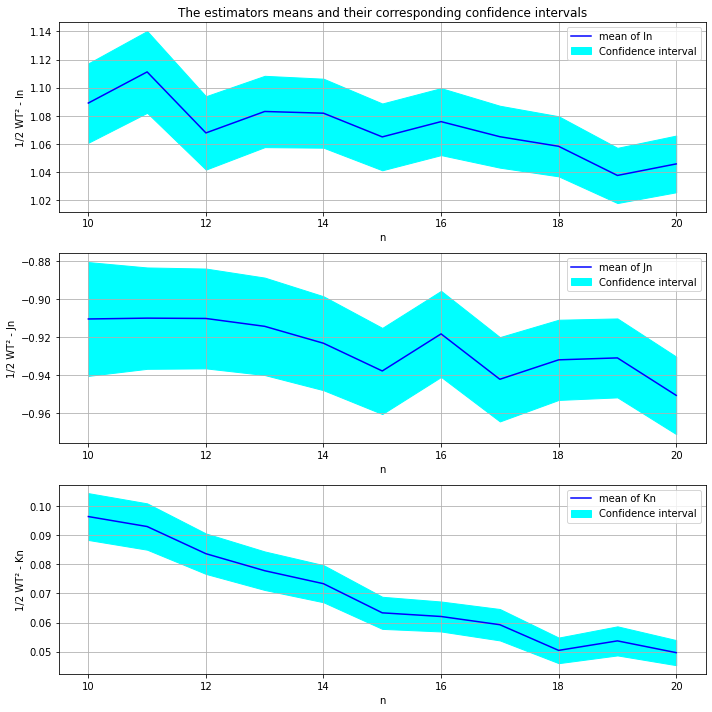

In [168]:
plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
plt.grid()
plt.title('The estimators means and their corresponding confidence intervals')
plt.plot(Ns, yI_mean, color = 'blue', label = 'mean of In', linewidth=1.5)
plt.xlabel("n")
plt.ylabel("1/2 WT² - In")
plt.fill_between(Ns, yI_mean - Interval_In, yI_mean + Interval_In, color = 'Cyan', label = 'Confidence interval')
plt.legend()
plt.subplot(3, 1, 2)
plt.grid()
plt.plot(Ns, yJ_mean, color = 'blue', label = 'mean of Jn', linewidth=1.5)
plt.xlabel("n")
plt.ylabel("1/2 WT² - Jn")
plt.fill_between(Ns, yJ_mean - Interval_Jn, yJ_mean + Interval_Jn, color = 'Cyan', label = 'Confidence interval')
plt.legend()
plt.subplot(3, 1, 3)
plt.grid()
plt.plot(Ns, yK_mean, color = 'blue', label = 'mean of Kn', linewidth=1.5)
plt.xlabel("n")
plt.ylabel("1/2 WT² - Kn")
plt.fill_between(Ns, yK_mean - Interval_Kn, yK_mean + Interval_Kn, color = 'Cyan', label = 'Confidence interval')
plt.legend()

plt.tight_layout()
plt.show()

## Question 2 : 

**we have,  according to Itô's formula :**
\begin{align} 
\frac{1}{2}  \: \mathcal{W^2}_{T} &= \int_0^\mathrm{T}{\mathcal{W}_t\mathcal{dW}_t}  + \int_0^\mathrm{T}{\frac{1}{2}dt} \\
 e^{\mathrm{T}} \mathcal{W}_{T} &= \int_0^\mathrm{T}{e^{\mathrm{t}}\mathcal{dW}_t}  + \int_0^\mathrm{T}{e^{\mathrm{t}} \:\mathcal{W}_{t} dt} 
\end{align}

**So by analogy we want to approximate** $\int_0^\mathrm{T}{e^{\mathrm{t}}\mathcal{dW}_t} \quad $ **using:**  $ \quad e^{\mathrm{T}} \mathcal{W}_{T}$

In [169]:
#simulating exp(T) * WT - An  

def sim_An(M=M, N=N, T=T): 
    Samples = np.zeros(M)
    for i in range(M): 
        W = brownianMotion(N, T)
        An = 0 
        for j in range(N): 
            An += np.exp(j / N) * (W[j + 1] - W[j])
        Samples[i] =  np.exp(T) * W[N] - An 
    
    return Samples 

In [179]:
#simulating exp(T) * WT - Bn  

def sim_Bn(M=M, N=N, T=T): 
    Samples = np.zeros(M)
    for i in range(M): 
        W = brownianMotion(N, T)
        An = 0 
        for j in range(N): 
            An += np.exp((j + 1) / N) * (W[j + 1] - W[j])
        Samples[i] =  np.exp(T) * W[N] - An 
    
    return Samples 

In [180]:
#simulating exp(T) * WT - Cn  

def sim_Cn(M=M, N=N, T=T): 
    Samples = np.zeros(M)
    for i in range(M): 
        W = brownianMotion(N, T)
        An = 0 
        for j in range(N): 
            An += np.exp((2 * j + 1) / (2 * N)) * (W[j + 1] - W[j])
        Samples[i] =  np.exp(T) * W[N] - An 
    
    return Samples 

In [181]:
An = sim_An(M, N, T)
Bn = sim_Bn(M, N, T)
Cn = sim_Cn(M, N, T)

#means
Mean_An = np.mean(An)
Mean_Bn = np.mean(Bn)
Mean_Cn = np.mean(Cn)

#confidence interval's half width 
Var_An = np.var(An)
Var_Bn = np.var(Bn)
Var_Cn = np.var(Cn)

interval_HW_An =  1.96 * np.sqrt(Var_An / M)
interval_HW_Bn =  1.96 * np.sqrt(Var_Bn / M)
interval_HW_Cn =  1.96 * np.sqrt(Var_Cn / M)


print("Sample size = %d" %(M)) 
print( "Means :" )
print("Mean of 1/2 WT² - An = %1.3f " %(Mean_An))
print("Mean of 1/2 WT² - Bn = %1.3f " %(Mean_Bn))
print("Mean of 1/2 WT² - Cn = %1.3f " %(Mean_Cn))
print( "Confidence interval's half width :")
print("Confidence interval half width of the estimator An = %1.3f" %(interval_HW_An))
print("Confidence interval half width of the estimator Bn = %1.3f" %(interval_HW_Bn))
print("Confidence interval half width of the estimator Cn = %1.3f" %(interval_HW_Cn))

Sample size = 1000
Means :
Mean of 1/2 WT² - An = 0.022 
Mean of 1/2 WT² - Bn = -0.281 
Mean of 1/2 WT² - Cn = -0.296 
Confidence interval's half width :
Confidence interval half width of the estimator An = 0.517
Confidence interval half width of the estimator Bn = 0.528
Confidence interval half width of the estimator Cn = 0.521


### Theory:

**We have :**
\begin{align} 
 e^{\mathrm{T}} \mathcal{W}_{T}- \int_0^\mathrm{T}{e^{\mathrm{t}}\mathcal{dW}_t}  &= \int_0^\mathrm{T}{e^{\mathrm{t}} \:\mathcal{W}_{t} dt} \\
\end{align}
**So if we take the mean, we get :**
\begin{align} 
\mathbb{E}(\int_0^\mathrm{T}{e^{\mathrm{t}} \:\mathcal{W}_{t} dt}) &\overset{fubini}{=} \int_0^\mathrm{T}{\mathbb{E}(e^{\mathrm{t}} \:\mathcal{W}_{t}) dt} \\
&= 0
\end{align}
**This matches the results we got numericaly.**

In [196]:
Ns = np.arange(10, 21,dtype = int)

#samples
yA = [ sim_An(M, n, T) for n in Ns]
yB = [ sim_Bn(M, n, T) for n in Ns]
yC = [ sim_Cn(M, n, T) for n in Ns]

#means 
yA_mean = np.array([ np.mean(x) for x in yA ])
yB_mean = np.array([ np.mean(x) for x in yB ])
yC_mean = np.array([ np.mean(x) for x in yC ])


#semi_intervals
Interval_An = np.array([ interval_HW(x) for x in yA ])
Interval_Bn = np.array([ interval_HW(x) for x in yB ])
Interval_Cn = np.array([ interval_HW(x) for x in yC ])

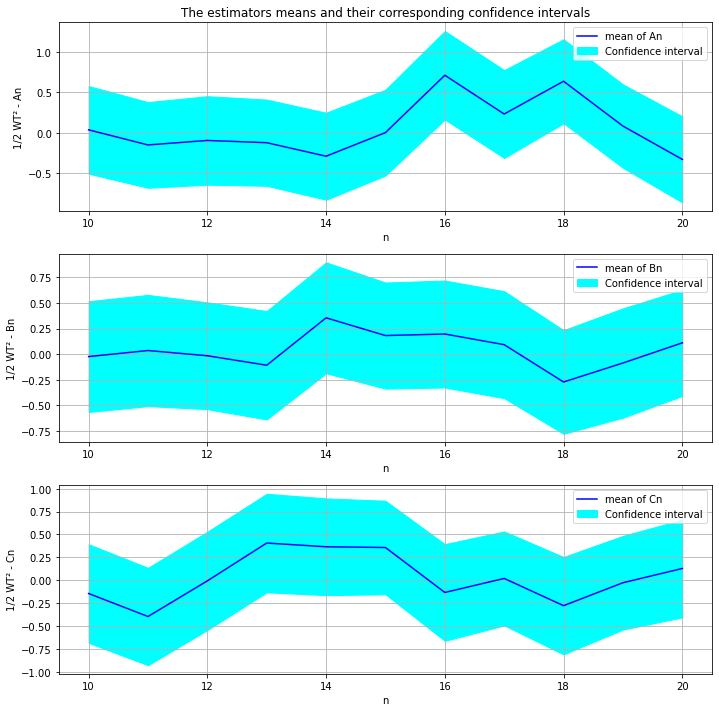

In [197]:
plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
plt.grid()
plt.title('The estimators means and their corresponding confidence intervals')
plt.plot(Ns, yA_mean, color = 'blue', label = 'mean of An', linewidth=1.5)
plt.xlabel("n")
plt.ylabel("1/2 WT² - An")
plt.fill_between(Ns, yA_mean - Interval_An, yA_mean + Interval_An, color = 'Cyan', label = 'Confidence interval')
plt.legend()
plt.subplot(3, 1, 2)
plt.grid()
plt.plot(Ns, yB_mean, color = 'blue', label = 'mean of Bn', linewidth=1.5)
plt.xlabel("n")
plt.ylabel("1/2 WT² - Bn")
plt.fill_between(Ns, yB_mean - Interval_Bn, yB_mean + Interval_Bn, color = 'Cyan', label = 'Confidence interval')
plt.legend()
plt.subplot(3, 1, 3)
plt.grid()
plt.plot(Ns, yC_mean, color = 'blue', label = 'mean of Cn', linewidth=1.5)
plt.xlabel("n")
plt.ylabel("1/2 WT² - Cn")
plt.fill_between(Ns, yC_mean - Interval_Cn, yC_mean + Interval_Cn, color = 'Cyan', label = 'Confidence interval')
plt.legend()

plt.tight_layout()
plt.show()

## Question 3 : 

### Question 3.a : 

In [164]:
def sim_Q3(M=M, N=N, T=T): 
    Samples = np.zeros(M)
    for i in range(M): 
        W = brownianMotion(N, T)
        An = 0 
        for j in range(N): 
            An += np.sin(W[j])
        Samples[i] = np.sin(W[N]) + (1 / (2 * n)) * An 
    
    return Samples 

In [165]:
Ns = np.arange(10, 201,dtype = int)
yAn = [ np.mean(sim_Q3(M, n, T)) for n in Ns]

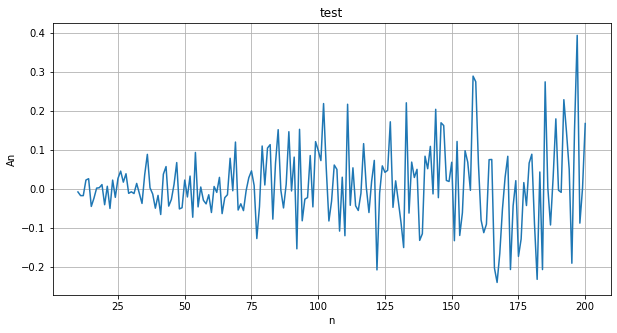

In [67]:
plt.figure(figsize=(10,5))
plt.plot(Ns, yAn)
plt.xlabel("n")
plt.ylabel("An")
plt.title('test')
plt.grid()
plt.show()

### Question 3.b : 

**We have,  according to Itô's formula :**
\begin{align} 
\sin(\mathcal{W}_{T})  &= \int_0^\mathrm{T}{\cos(\mathcal{W}_t)\mathcal{dW}_t}  + \int_0^\mathrm{T}{-\frac{1}{2}\sin(\mathcal{W}_{T})dt} \\
\end{align}
\
**Since** $\quad$ $ \frac{1}{2n}\sum_{i=1}^n{ \sin(\mathcal{W}_{t_{i-1}^n}  \:) } $ $\quad$ **approximates** $\quad$ $\int_0^\mathrm{T}{\frac{1}{2}\sin(\mathcal{W}_{T})dt}$.\
\
**we get :**
\begin{equation}
\mathcal{A}_n   \xrightarrow{n \rightarrow +\infty }   \int_0^\mathrm{T}{\cos(\mathcal{W}_t)\mathcal{dW}_t} 
\end{equation}